# Machine Learning Foundation

## Course 3, Part c: Support Vector Machines DEMO


## Introduction

We will be using the wine quality data set for these exercises. This data set contains various chemical properties of wine, such as acidity, sugar, pH, and alcohol. It also contains a quality metric (3-9, with highest being better) and a color (red or white). The name of the file is `Wine_Quality_Data.csv`.


In [1]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn
# !pip install scikit-learn

In [2]:
# Define a function to suppress warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# Import necessary libraries
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

## Part 1: Setup

* Import the data.
* Create the target variable `y` as a 1/0 column where 1 means red.
* Create a `pairplot` for the dataset.
* Create a bar plot showing the correlations between each column and `y`
* Pick the most 2 correlated fields (using the absolute value of correlations) and create `X`
* Use MinMaxScaler to scale `X`. Note that this will output a np.array. Make it a DataFrame again and rename the columns appropriately.


In [3]:
# Load the dataset from the provided URL
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML241EN-SkillsNetwork/labs/datasets/Wine_Quality_Data.csv", sep=',')

In [4]:
# Create the target variable 'y' (1 for red wine, 0 otherwise)
y = (data['color'] == 'red').astype(int)

# Get all column names except the last one ('color') as potential features
fields = list(data.columns[:-1])  # everything except "color"

# Calculate Pearson correlation between each feature and the target variable 'y'
correlations = data[fields].corrwith(y)

# Sort correlations in ascending order
correlations.sort_values(inplace=True)

# Display the correlations
correlations

total_sulfur_dioxide   -0.700357
free_sulfur_dioxide    -0.471644
residual_sugar         -0.348821
citric_acid            -0.187397
quality                -0.119323
alcohol                -0.032970
pH                      0.329129
density                 0.390645
fixed_acidity           0.486740
sulphates               0.487218
chlorides               0.512678
volatile_acidity        0.653036
dtype: float64

In [5]:
# Set the context for the plots to 'talk' (larger elements)
sns.set_context('talk')

# Set the style of the plots to 'white'
sns.set_style('white')

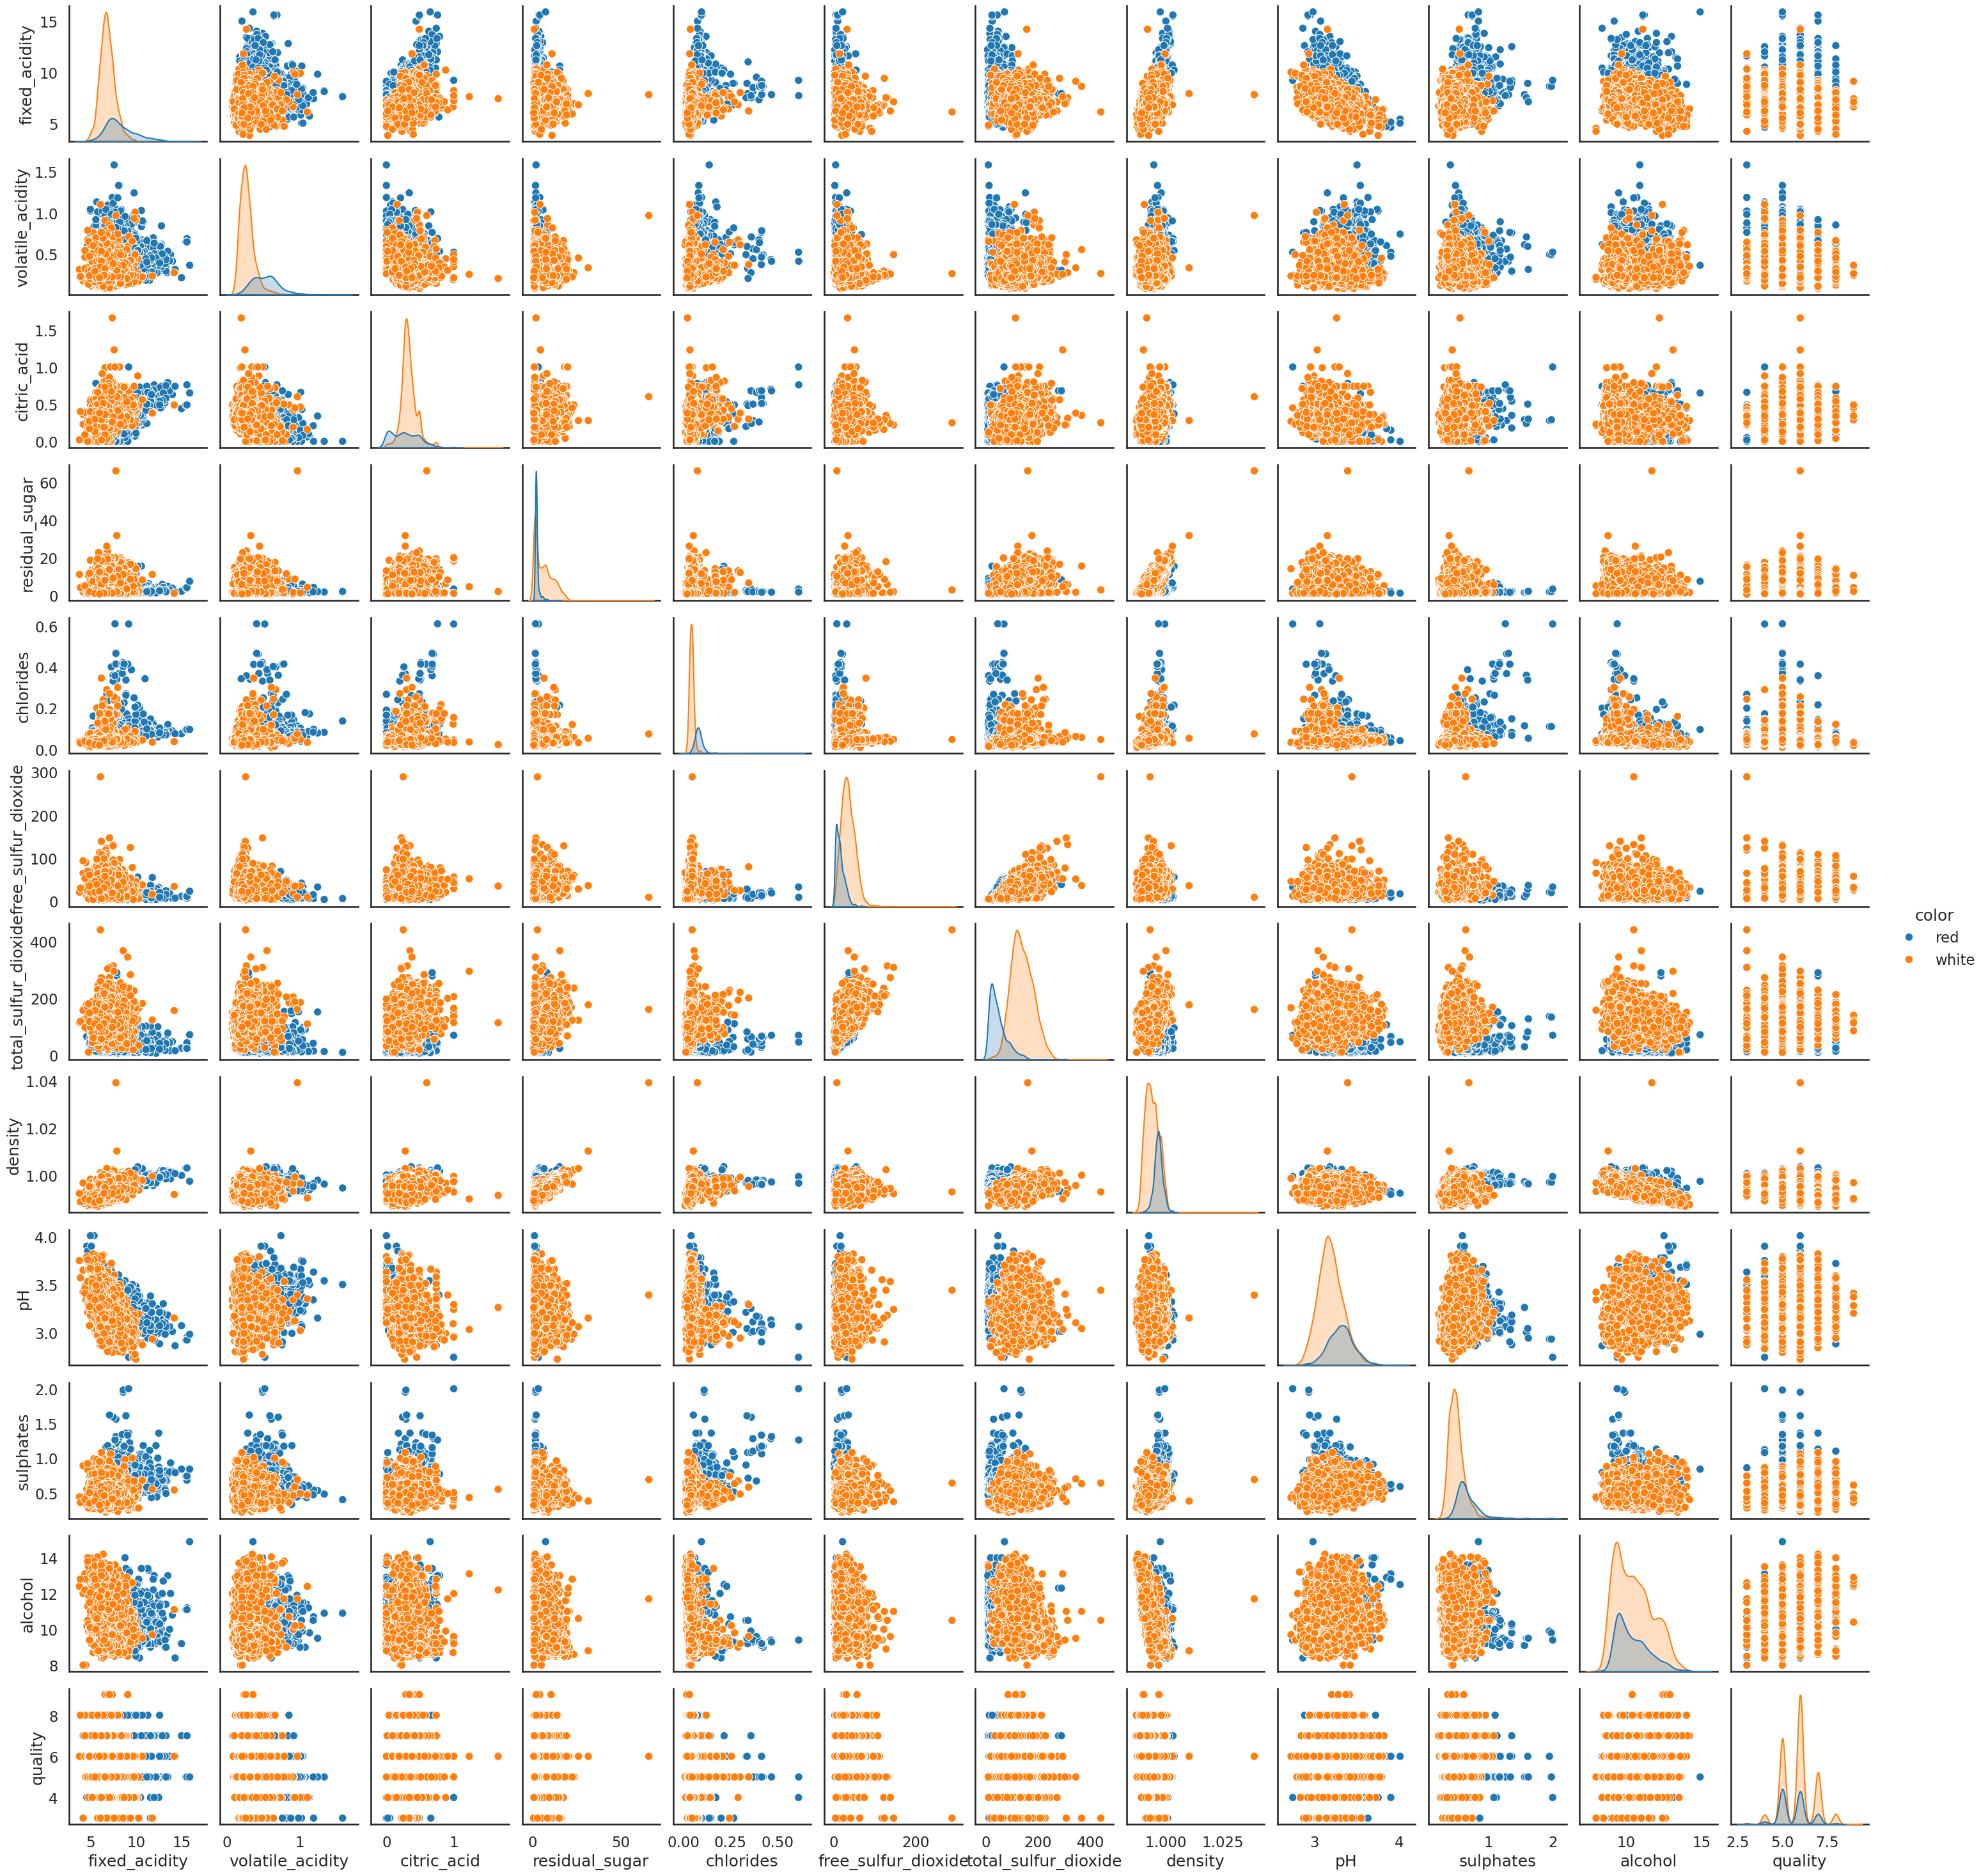

In [6]:
# Create a pair plot of the dataset, coloring points by 'color'
sns.pairplot(data, hue='color')

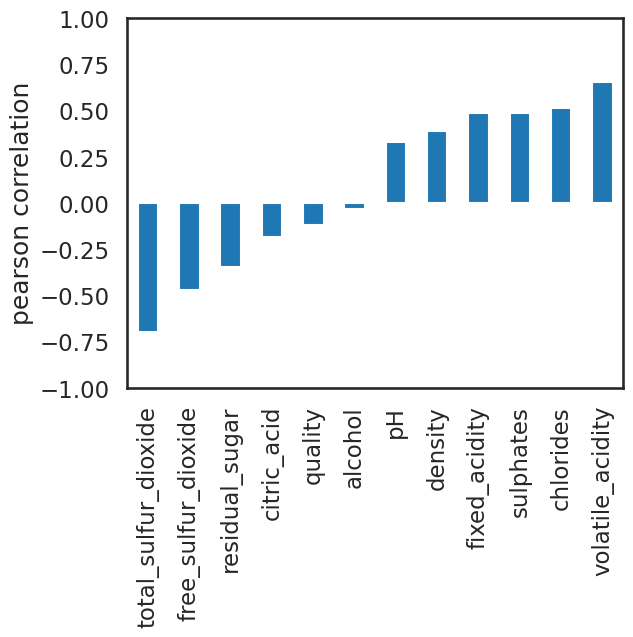

In [7]:
# Create a bar plot of the correlations
ax = correlations.plot(kind='bar')
# Set the y-axis limits and label
ax.set(ylim=[-1, 1], ylabel='pearson correlation');

In [8]:
from sklearn.preprocessing import MinMaxScaler

# Select the two fields with the highest absolute correlation with 'y'
fields = correlations.map(abs).sort_values().iloc[-2:].index

print(fields)

# Create the feature matrix X using the selected fields
X = data[fields]

# Initialize a MinMaxScaler
scaler = MinMaxScaler()

# Scale the features in X
X = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame and rename columns
X = pd.DataFrame(X, columns=['%s_scaled' % fld for fld in fields])

print(X.columns)

Index(['volatile_acidity', 'total_sulfur_dioxide'], dtype='object')
Index(['volatile_acidity_scaled', 'total_sulfur_dioxide_scaled'], dtype='object')


## Part 2: Linear Decision Boundary

Our goal is to look at the decision boundary of a LinearSVC classifier on this dataset. Check out [this example](https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html#sphx-glr-auto-examples-svm-plot-iris-svc-py) in sklearn's documentation.

* Fit a Linear Support Vector Machine Classifier to `X`, `y`.
* Pick 300 samples from `X`. Get the corresponding `y` value. Store them in variables `X_color` and `y_color`. This is because original dataset is too large and it produces a crowded plot.
* Modify `y_color` so that it has the value "red" instead of 1 and 'yellow' instead of 0.
* Scatter plot X_color's columns. Use the keyword argument "color=y_color" to color code samples.
* Use the code snippet below to plot the decision surface in a color coded way.

```python
x_axis, y_axis = np.arange(0, 1, .005), np.arange(0, 1, .005)
xx, yy = np.meshgrid(x_axis, y_axis)
xx_ravel = xx.ravel()
yy_ravel = yy.ravel()
X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
y_grid_predictions = *[YOUR MODEL]*.predict(X_grid)
y_grid_predictions = y_grid_predictions.reshape(xx.shape)
ax.contourf(xx, yy, y_grid_predictions, cmap=colors, alpha=.3)
```

With LinearSVC, it is easy to experiment with different parameter choices and see the decision boundary.


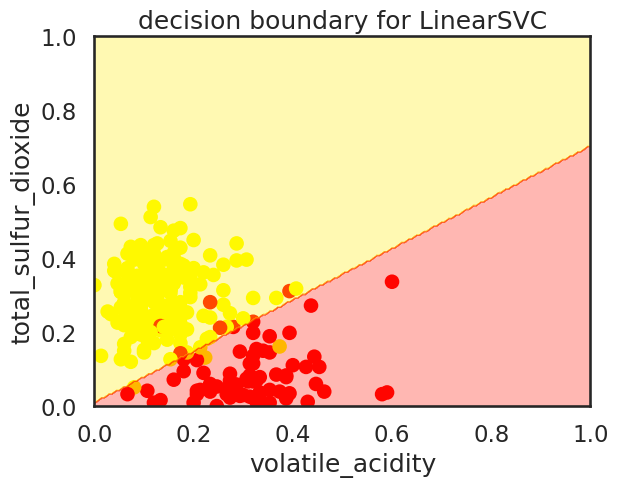

In [9]:
from sklearn.svm import LinearSVC

# Initialize and fit a Linear Support Vector Classifier
LSVC = LinearSVC()
LSVC.fit(X, y)

# Sample 300 data points from X for plotting
X_color = X.sample(300, random_state=45)

# Get the corresponding target values for the sampled data
y_color = y.loc[X_color.index]

# Map the target values to 'red' and 'yellow' strings for coloring
y_color = y_color.map(lambda r: 'red' if r == 1 else 'yellow')

# Create an axes object for plotting
ax = plt.axes()
ax.scatter(
    X_color.iloc[:, 0], X_color.iloc[:, 1],
    color=y_color, alpha=1)

# -----------
# Create a meshgrid for plotting the decision boundary
x_axis, y_axis = np.arange(0, 1.005, .005), np.arange(0, 1.005, .005)
xx, yy = np.meshgrid(x_axis, y_axis)

# Flatten the meshgrid arrays
xx_ravel = xx.ravel()
yy_ravel = yy.ravel()

# Create a DataFrame from the flattened meshgrid for prediction
X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T

# Predict the class for each point in the meshgrid
y_grid_predictions = LSVC.predict(X_grid)

# Reshape the predictions back to the meshgrid shape
y_grid_predictions = y_grid_predictions.reshape(xx.shape)

# Plot the decision boundary using contourf
ax.contourf(xx, yy, y_grid_predictions, cmap=plt.cm.autumn_r, alpha=.3)

# -----------
# Set the labels, limits, and title of the plot
ax.set(
    xlabel=fields[0],
    ylabel=fields[1],
    xlim=[0, 1],
    ylim=[0, 1],
    title='decision boundary for LinearSVC');

## Part 3: Gaussian Kernel

Let's now fit a Gaussian kernel SVC and see how the decision boundary changes.

* Consolidate the code snippets in Question 2 into one function which takes in an estimator, `X` and `y`, and produces the final plot with decision boundary. The steps are:
    <ol>
     <li> Fit model
     <li> Get sample 300 records from X and the corresponding y's
     <li> Create grid, predict, plot using ax.contourf
     <li> Add on the scatter plot
    </ol>
* After copying and pasting code, the finished function uses the input `estimator` and not the LinearSVC model.
* For the following values of `gamma`, create a Gaussian Kernel SVC and plot the decision boundary.  
`gammas = [.5, 1, 2, 10]`
* Holding `gamma` constant, we plot the decision boundary for various values of `C`:
`[.1, 1, 10]`


In [12]:
# Define a function to plot the decision boundary of a given estimator
def plot_decision_boundary(estimator, X, y):

    # Fit the estimator to the data
    estimator.fit(X, y)
    X_color = X.sample(300)

    # Get the corresponding target values for the sampled data
    y_color = y.loc[X_color.index]

    # Map the target values to 'red' and 'yellow' strings for coloring
    y_color = y_color.map(lambda r: 'red' if r == 1 else 'yellow')

    # Create a meshgrid for plotting the decision boundary
    x_axis, y_axis = np.arange(0, 1, .005), np.arange(0, 1, .005)
    xx, yy = np.meshgrid(x_axis, y_axis)

    # Flatten the meshgrid arrays
    xx_ravel = xx.ravel()
    yy_ravel = yy.ravel()

    # Create a DataFrame from the flattened meshgrid for prediction
    X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T

    # Predict the class for each point in the meshgrid
    y_grid_predictions = estimator.predict(X_grid)

    # Reshape the predictions back to the meshgrid shape
    y_grid_predictions = y_grid_predictions.reshape(xx.shape)

    # Create a figure
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.contourf(xx, yy, y_grid_predictions, cmap=plt.cm.autumn_r, alpha=.3)
    ax.scatter(X_color.iloc[:, 0], X_color.iloc[:, 1], color=y_color, alpha=1)

    # Set the labels and title of the plot
    ax.set(
        xlabel=fields[0],
        ylabel=fields[1],
        title='Decision Boundary'
    )

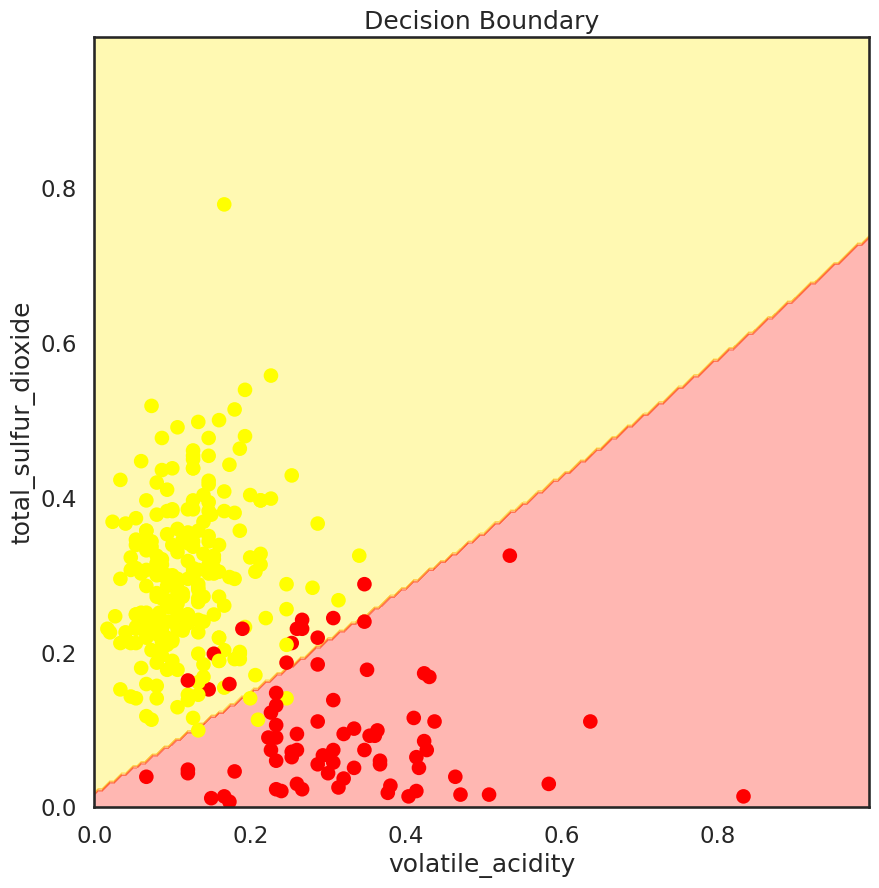

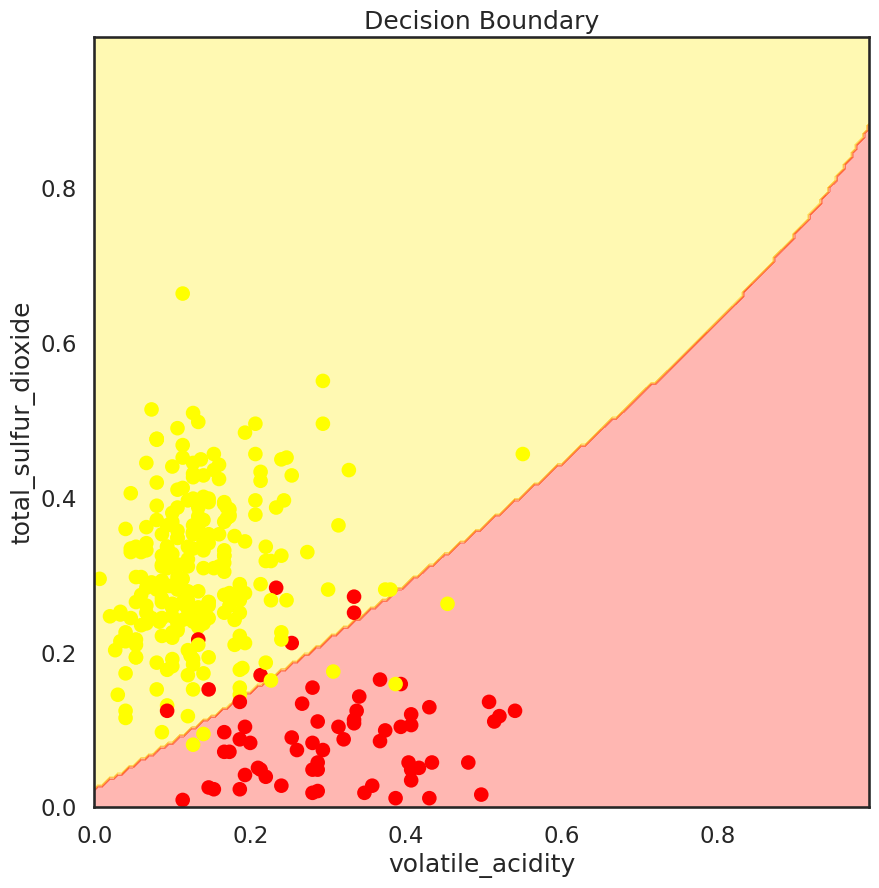

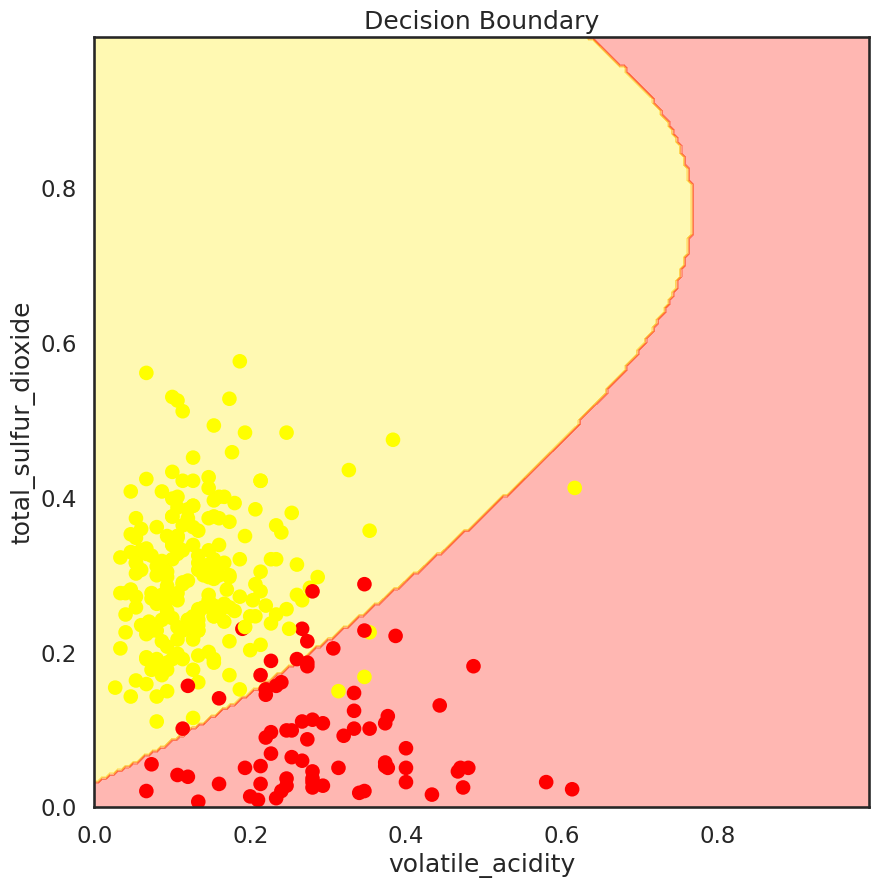

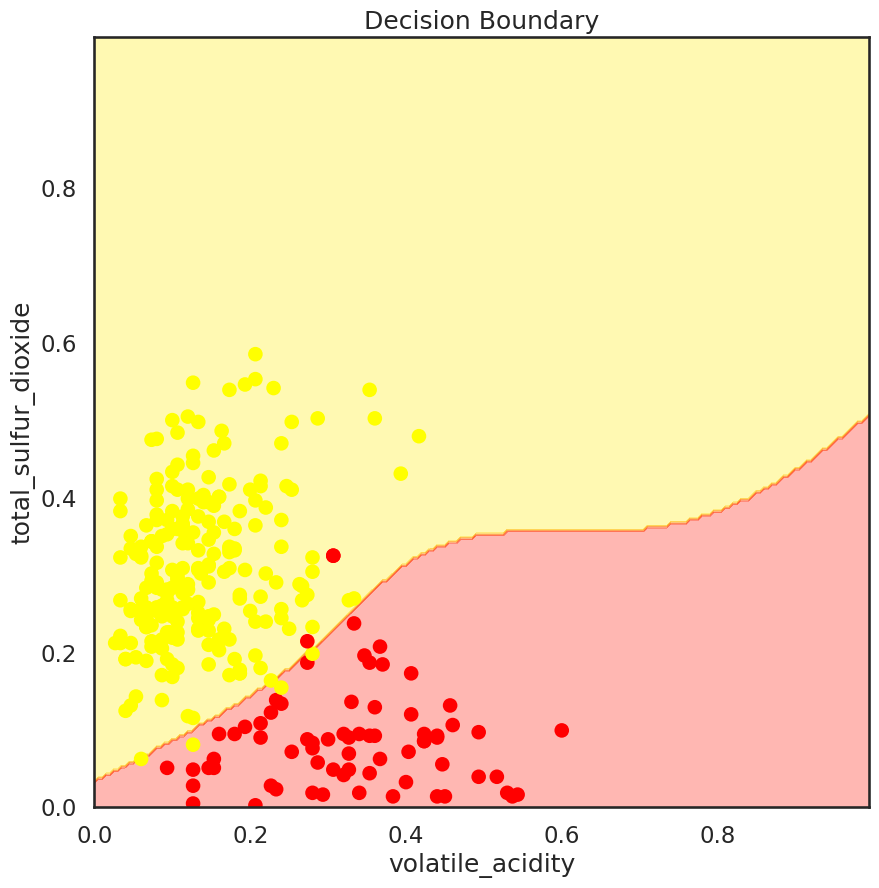

In [14]:
from sklearn.svm import SVC

# Define a list of gamma values to experiment with
gammas = [.5, 1, 2, 10]

for gamma in gammas:
    # Initialize an SVC with a Gaussian kernel and the current gamma
    SVC_Gaussian = SVC(kernel='rbf', gamma=gamma)
    # Plot the decision boundary for the current SVC
    plot_decision_boundary(SVC_Gaussian, X, y)

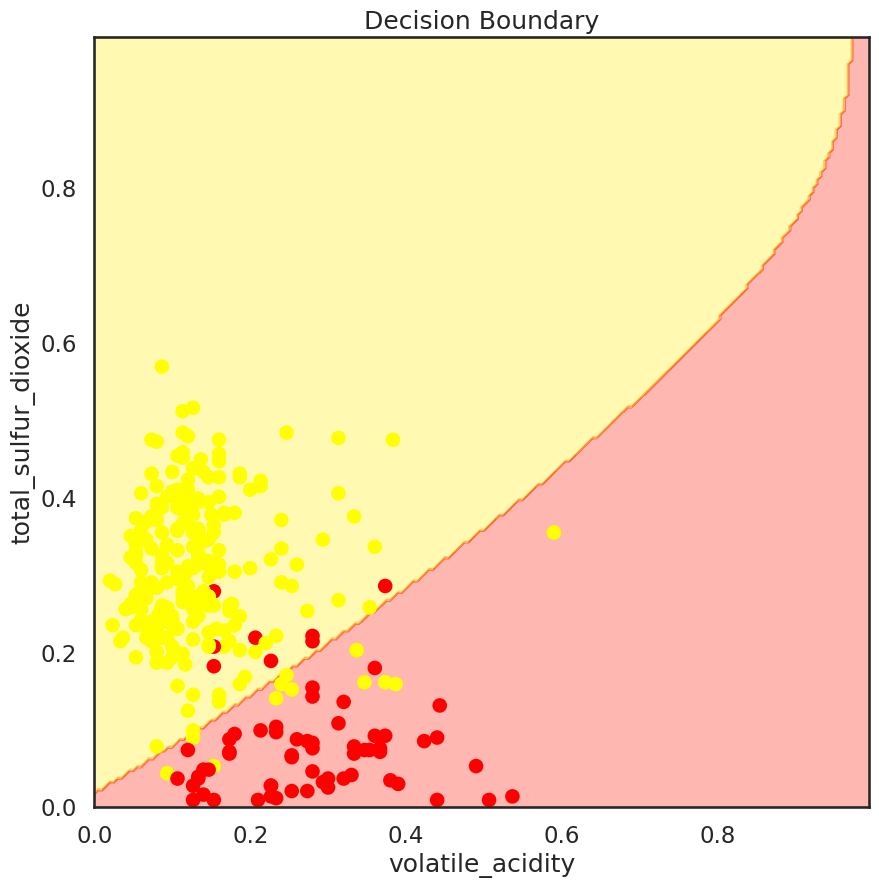

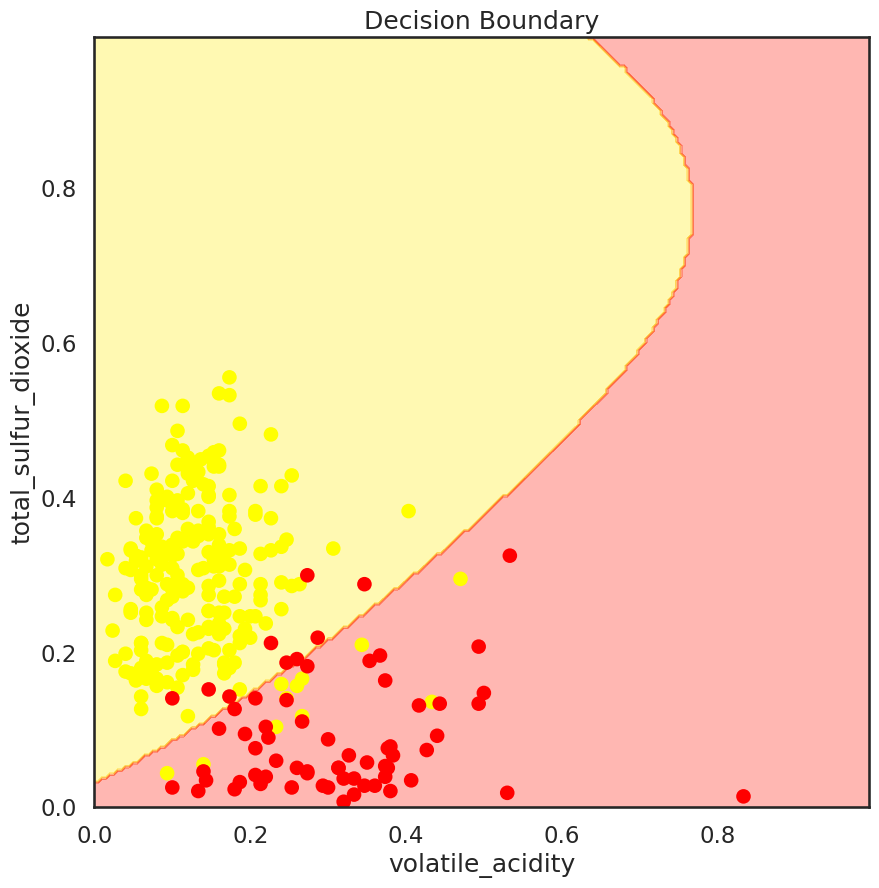

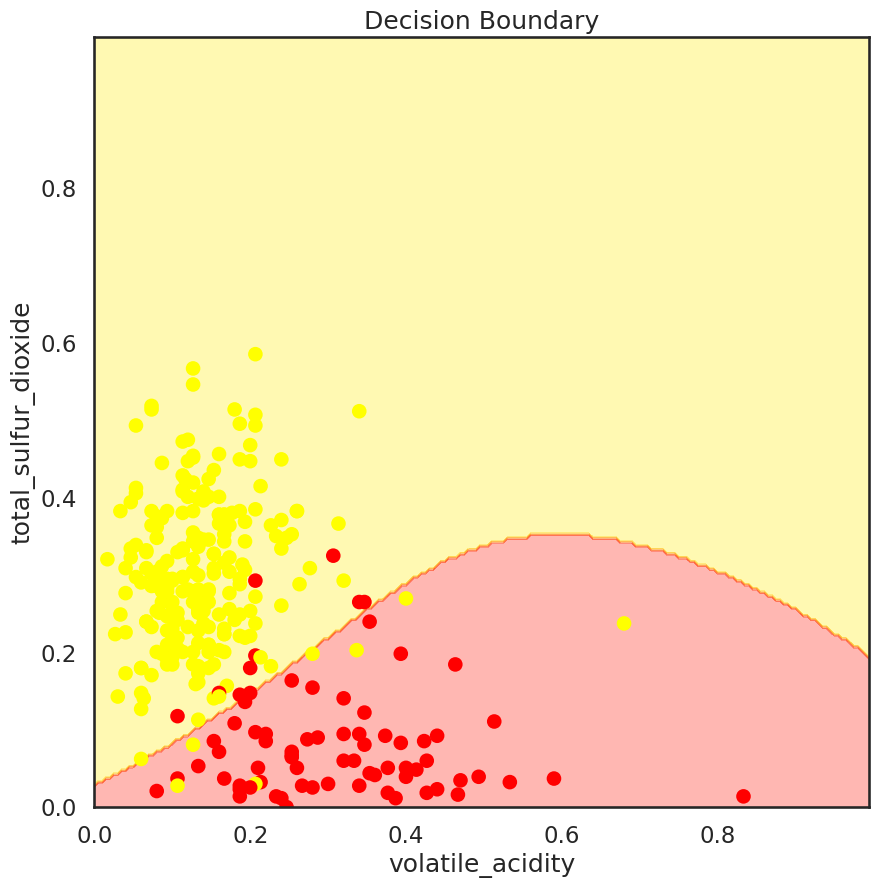

In [15]:
# Define a list of C values to experiment with
Cs = [.1, 1, 10]

for C in Cs:
    # Initialize an SVC with a Gaussian kernel, gamma=2, and the current C
    SVC_Gaussian = SVC(kernel='rbf', gamma=2, C=C)

    # Plot the decision boundary for the current SVC
    plot_decision_boundary(SVC_Gaussian, X, y)

## Part 4: Comparing Kernel Execution Times

In this exercise, we will compare the fitting times between SVC vs Nystroem with rbf kernel.  
<br><br>
Jupyter Notebooks provide a useful magic function **`%timeit`** which executes a line and prints out the time it took to fit. If we type **`%%timeit`** in the beginning of the cell, it will output the execution time.

We proceed with the following steps:
* Create `y` from data.color, and `X` from the rest of the columns.
* Use `%%timeit` to get the time for fitting an SVC with rbf kernel.
* Use `%%timeit` to get the time for the following: fit_transform the data with Nystroem and then fit a SGDClassifier.

Nystroem+SGD will take much less to fit. This difference will be more pronounced if the dataset was bigger.

* Make 5 copies of X and concatenate them
* Make 5 copies of y and concatenate them
* Compare the time it takes to fit the both methods above


In [16]:
from sklearn.kernel_approximation import Nystroem
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

# Create the target variable 'y' (True for red wine, False otherwise)
y = data.color == 'red'

# Create the feature matrix X from all columns except 'color'
X = data[data.columns[:-1]]

# Define keyword arguments for the kernel (rbf)
kwargs = {'kernel': 'rbf'}

# Initialize an SVC with the specified kernel
svc = SVC(**kwargs)

# Initialize a Nystroem kernel approximation with the specified kernel
nystroem = Nystroem(**kwargs)

# Initialize a Stochastic Gradient Descent Classifier
sgd = SGDClassifier()

In [17]:
# Use the %%timeit magic command to measure the execution time
%%timeit
svc.fit(X, y)

414 ms ± 11.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [18]:
%%timeit
X_transformed = nystroem.fit_transform(X)
sgd.fit(X_transformed, y)

206 ms ± 30.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [19]:
# Create 5 copies of X y and concatenate them
X2 = pd.concat([X]*5)

y2 = pd.concat([y]*5)

# Print the shape of the concatenated X y
print(X2.shape)
print(y2.shape)

(32485, 12)
(32485,)


In [20]:
# Use the %timeit magic command to measure the execution time of fitting the SVC on the larger dataset
%timeit svc.fit(X2, y2)

11.9 s ± 2.88 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [21]:
# Use the %%timeit magic command to measure the execution time of Nystroem transformation and SGD fitting on the larger dataset
%%timeit
X2_transformed = nystroem.fit_transform(X2)
sgd.fit(X2_transformed, y2)

743 ms ± 149 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


---
### Machine Learning Foundation (C) 2020 IBM Corporation
